<a href="https://colab.research.google.com/github/Mads8760/Ciencia-de-dados/blob/main/Music_%26_Mental_Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/mxmh_survey_results.csv')
print(df.head())


            Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
0           Yes             Yes      Yes             Latin         Yes   
1           Yes              No       No              Rock         Yes   
2            No              No       No  Video game music          No   
3           Yes              No      Yes              Jazz         Yes   
4           Yes              No       No               R&B         Yes   

  Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0               Yes  ...        Sometimes  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [4]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [5]:
# Contar valores ausentes por coluna
valores_ausentes = df.isnull().sum()

# Exibir apenas colunas com valores ausentes
valores_ausentes[valores_ausentes > 0]


,0
Age,1
Primary streaming service,1
While working,3
Instrumentalist,4
Composer,1
Foreign languages,4
BPM,107
Music effects,8


In [6]:
# Contar registros duplicados
num_duplicated = df.duplicated().sum()

print(f"Número de registros duplicados: {num_duplicated}")

# Exibir registros duplicados, se houver
if num_duplicated > 0:
    df[df.duplicated()]

Número de registros duplicados: 0


In [7]:
# Preencher valores ausentes em colunas categóricas com "desconhecido"
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna("desconhecido")

df = df.drop(columns=['BPM'])

# Verificar se os valores ausentes foram tratados
print("Valores ausentes após tratamento:")
print(df.isnull().sum().sum())


Valores ausentes após tratamento:
1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     736 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 736 non-null    object 
 5   Instrumentalist               736 non-null    object 
 6   Composer                      736 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             736 non-null    object 
 10  Frequency [Classical]         736 non-null    object 
 11  Frequency [Country]           736 non-null    object 
 12  Frequency [EDM]               736 non-null    object 
 13  Frequ

In [9]:
# Verificar se há valores não numéricos e convertê-los ou removê-los
df = df.dropna(subset=['Age', 'Anxiety', 'Depression', 'Insomnia', 'OCD'])
df.head()


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,desconhecido,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,desconhecido,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [10]:
df['Age'] = df['Age'].astype(int)
df['Anxiety'] = df['Anxiety'].astype(int)
df['Depression'] = df['Depression'].astype(int)
df['Insomnia'] = df['Insomnia'].astype(int)
df['OCD'] = df['OCD'].astype(int)
df.head(30)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3,0,1,0,desconhecido,I understand.
1,8/27/2022 19:57:31,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7,2,2,1,desconhecido,I understand.
2,8/27/2022 21:28:18,18,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect,I understand.
3,8/27/2022 21:40:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9,7,3,3,Improve,I understand.
4,8/27/2022 21:54:47,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve,I understand.
5,8/27/2022 21:56:50,18,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve,I understand.
6,8/27/2022 22:00:29,18,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4,8,6,0,Improve,I understand.
7,8/27/2022 22:18:59,21,Spotify,1.0,Yes,No,No,K pop,Yes,Yes,...,Sometimes,Rarely,Never,Rarely,5,3,5,3,Improve,I understand.
8,8/27/2022 22:33:05,19,Spotify,6.0,Yes,No,No,Rock,No,No,...,Never,Never,Very frequently,Never,2,0,0,0,Improve,I understand.
9,8/27/2022 22:44:03,18,I do not use a streaming service.,1.0,Yes,No,No,R&B,Yes,Yes,...,Sometimes,Rarely,Sometimes,Sometimes,2,2,5,1,Improve,I understand.


In [13]:
# Verificar as datas mínimas e máximas no dataset
print("Idade mínima:", df['Age'].min())
print("Idade máxima:", df['Age'].max())

# Contar quantos dias distintos existem
idade_unica = df['Age'].nunique()
print(f"Número de idade distintos no dataset: {idade_unica}")

Idade mínima: 10
Idade máxima: 89
Número de idade distintos no dataset: 61


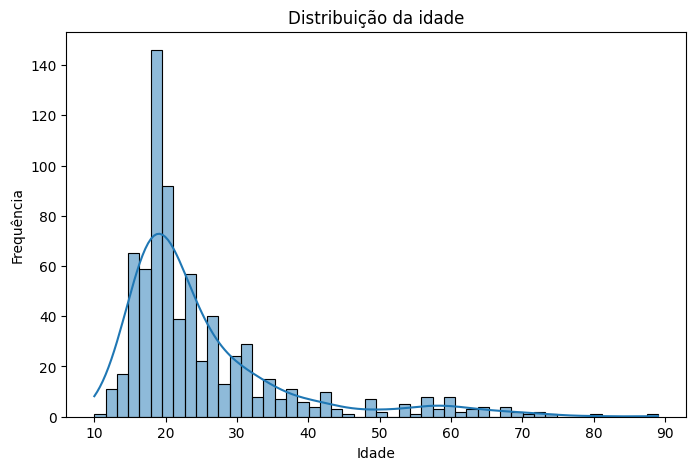

In [14]:
# Criar um histograma para visualizar a distribuição da idade
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=50, kde=True)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição da idade')
plt.show()

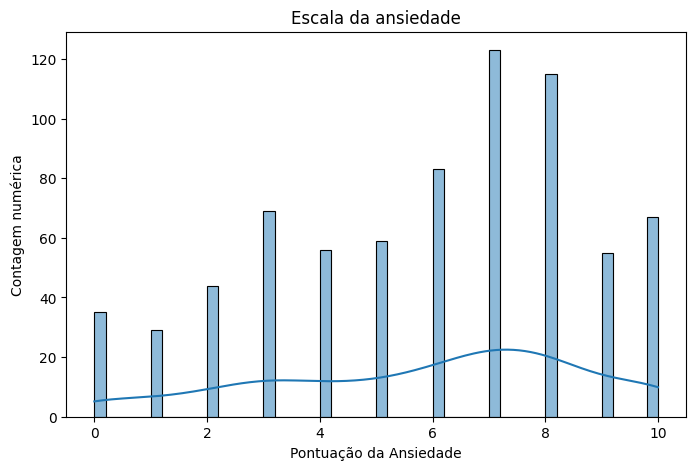

In [15]:
# Criar um histograma para visualizar a distribuição da Ansiedade
plt.figure(figsize=(8, 5))
sns.histplot(df['Anxiety'], bins=50, kde=True)
plt.xlabel('Pontuação da Ansiedade')
plt.ylabel('Contagem numérica')
plt.title('Escala da ansiedade')
plt.show()

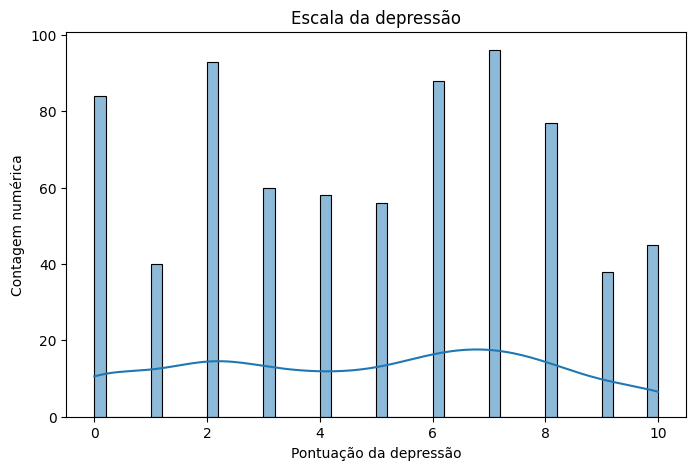

In [16]:
# Criar um histograma para visualizar a distribuição da depressão
plt.figure(figsize=(8, 5))
sns.histplot(df['Depression'], bins=50, kde=True)
plt.xlabel('Pontuação da depressão')
plt.ylabel('Contagem numérica')
plt.title('Escala da depressão')
plt.show()

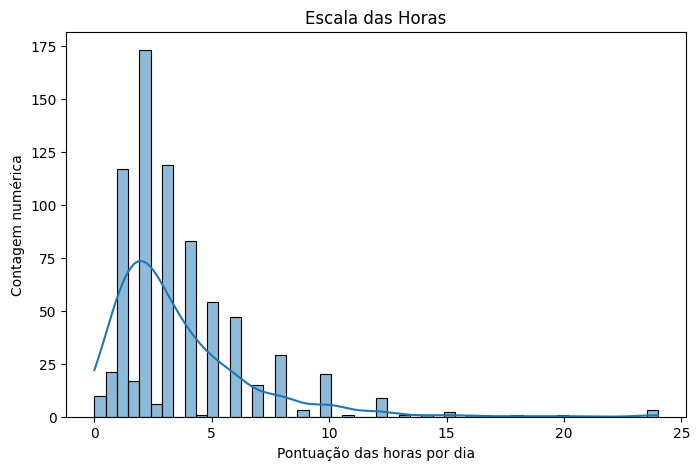

In [17]:
# Criar um histograma para visualizar a distribuição das horas por dia
plt.figure(figsize=(8, 5))
sns.histplot(df['Hours per day'], bins=50, kde=True)
plt.xlabel('Pontuação das horas por dia')
plt.ylabel('Contagem numérica')
plt.title('Escala das Horas')
plt.show()

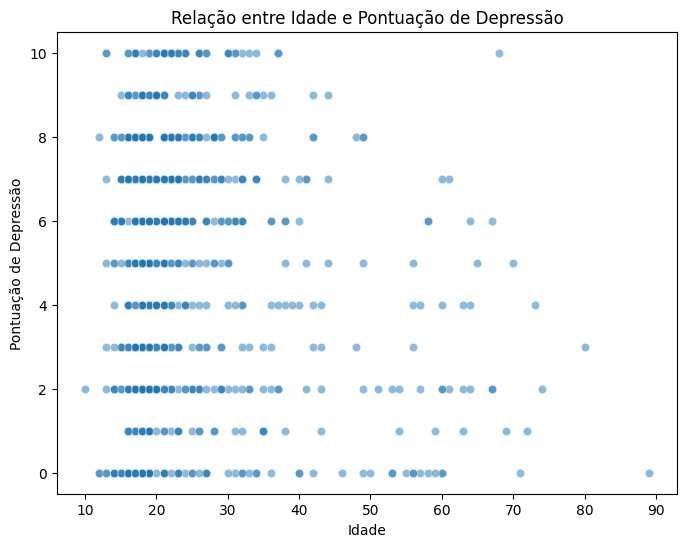

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
sns.scatterplot(data=df, x='Age', y='Depression', alpha=0.5)
plt.title('Relação entre Idade e Pontuação de Depressão')
plt.xlabel('Idade')
plt.ylabel('Pontuação de Depressão')
plt.show()

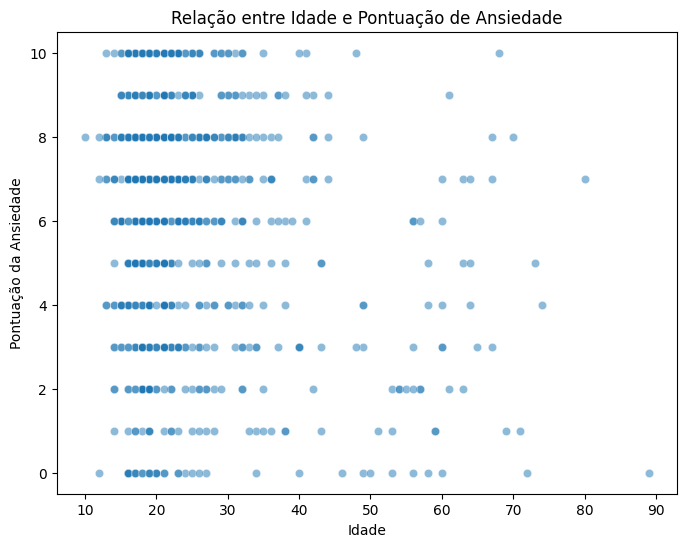

In [19]:
# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
sns.scatterplot(data=df, x='Age', y='Anxiety', alpha=0.5)
plt.title('Relação entre Idade e Pontuação de Ansiedade')
plt.xlabel('Idade')
plt.ylabel('Pontuação da Ansiedade')
plt.show()

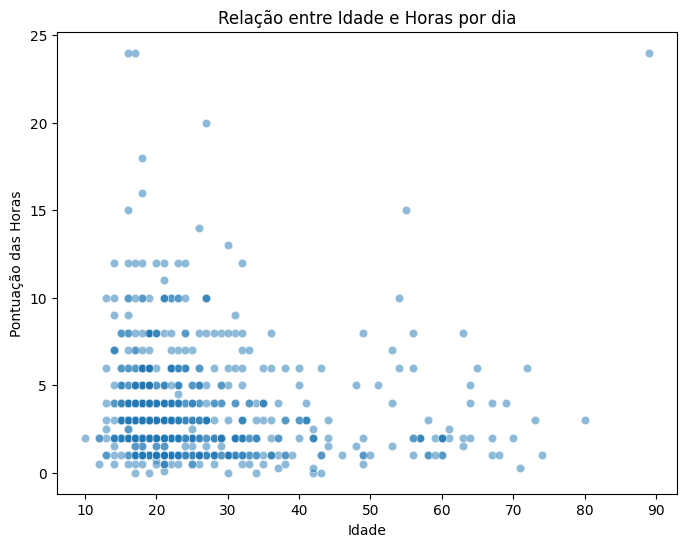

In [20]:
# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
sns.scatterplot(data=df, x='Age', y='Hours per day', alpha=0.5)
plt.title('Relação entre Idade e Horas por dia')
plt.xlabel('Idade')
plt.ylabel('Pontuação das Horas')
plt.show()

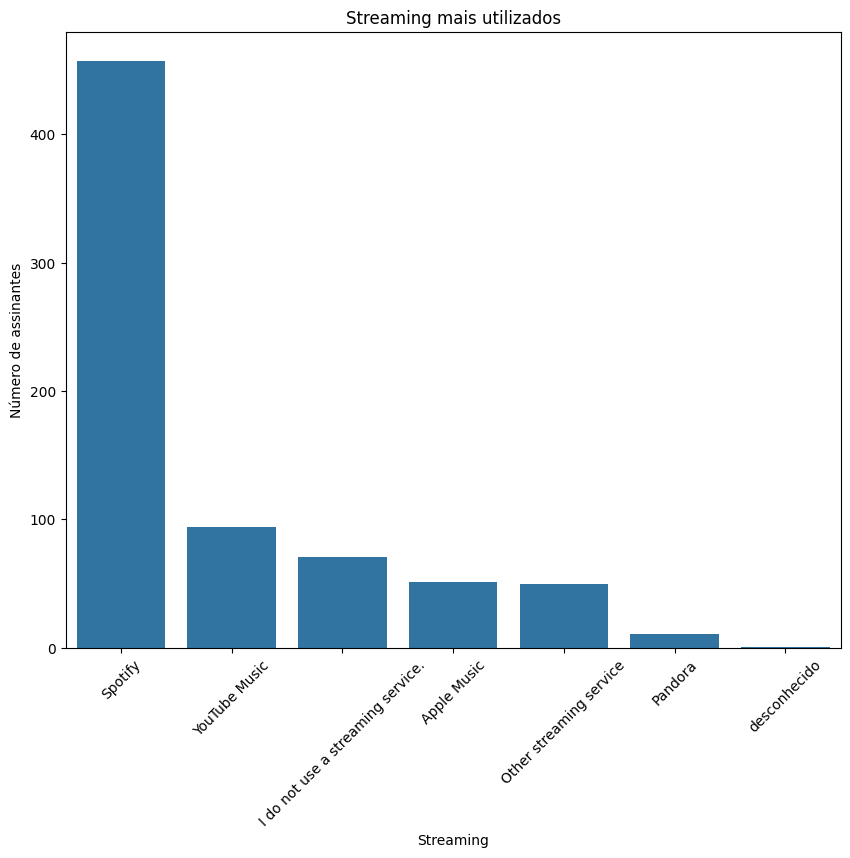

In [21]:
# Contar os stremings mais utilizados
top_categorias = df['Primary streaming service'].value_counts().head(10)

# Criar um gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(x=top_categorias.index, y=top_categorias.values)
plt.xlabel('Streaming')
plt.ylabel('Número de assinantes')
plt.title('Streaming mais utilizados')
plt.xticks(rotation=45)
plt.show()


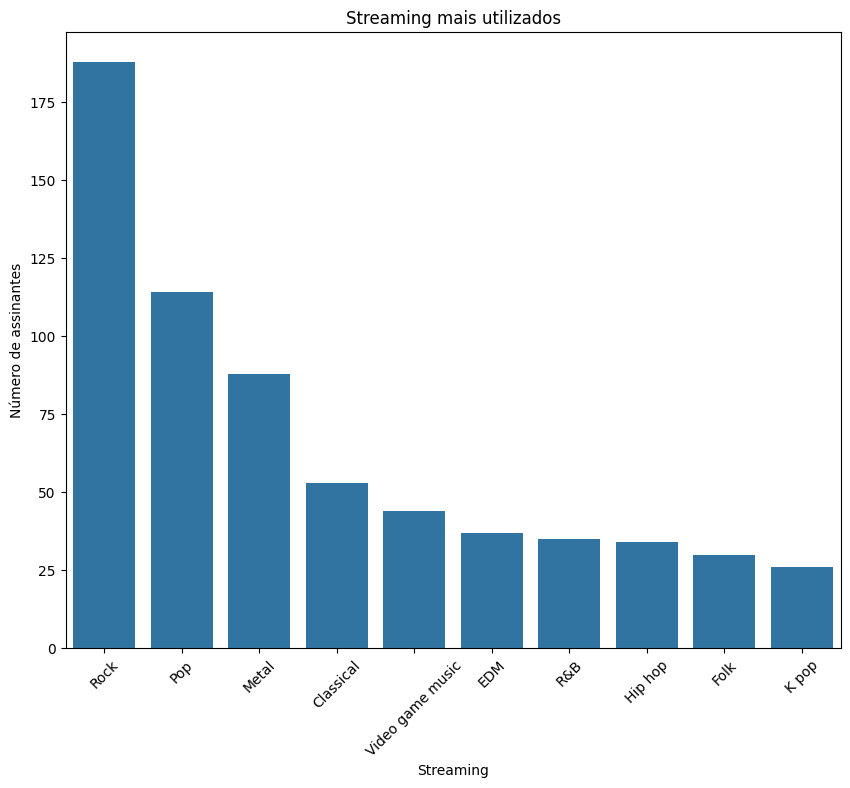

In [22]:
# Contar os gêneros favoritos
top_categorias = df['Fav genre'].value_counts().head(10)

# Criar um gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(x=top_categorias.index, y=top_categorias.values)
plt.xlabel('Streaming')
plt.ylabel('Número de assinantes')
plt.title('Streaming mais utilizados')
plt.xticks(rotation=45)
plt.show()
